In [1]:
import pandas as pd
import os

%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [15]:
pd.options.display.float_format = '{:0,.1%}'.format

In [7]:
# Relative path between notebooks and goruped output directories
relative_path = '../../../outputs/grouped'

In [23]:
CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

# Calibration Sheet
For base scenario validation

## Tour Mode Share

,survey,sc_2025_20_5
Bike,1.4%,1.7%
HOV2,21.9%,22.1%
HOV3+,19.7%,19.4%
Park,0.9%,0.6%
SOV,33.6%,32.8%
School Bus,3.5%,3.1%
Transit,5.8%,4.8%
Walk,12.2%,15.5%


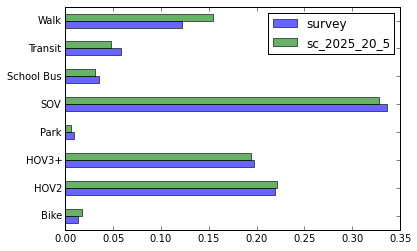

In [30]:
df = pd.read_csv(os.path.join(relative_path,'tours_tlvdest.csv'))
# Save results by source as seperate df
df_dict = {}
for source in df.groupby('source').count().index.tolist():
    df_dict[source] = df[df['source'] == source]
    
dfplot = pd.DataFrame([df_dict[i].groupby('tmodetp').sum()['toexpfac']/df_dict[i].sum()['toexpfac'] for i in df_dict.keys()]).T
dfplot.columns = df_dict.keys()
dfplot = dfplot.drop('Other', axis=0)
dfplot.plot(kind='barh', alpha=0.6)
display(dfplot)

## Tour Purpose Distribution

,survey,sc_2025_20_5
pdpurp,,
Escort,10.8%,10.6%
Meal,5.0%,7.0%
Personal Business,12.1%,12.3%
School,13.3%,10.9%
Shop,11.9%,12.9%
Social,18.2%,20.4%
Work,28.7%,25.8%


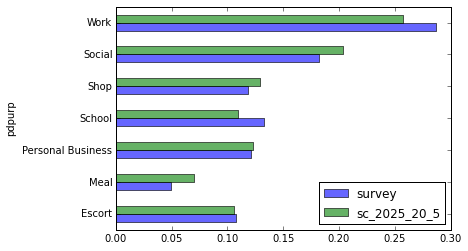

In [31]:
# Reformat to plot
dfplot = pd.DataFrame([df_dict[i].groupby('pdpurp').sum()['toexpfac']/df_dict[i].sum()['toexpfac'] for i in df_dict.keys()]).T
dfplot.columns = df_dict.keys()
dfplot.plot(kind='barh', alpha=0.6)
display(dfplot)

## Screenlines

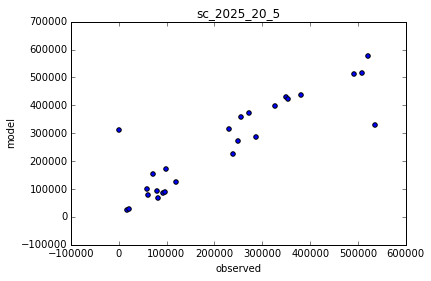

In [32]:
df = pd.read_csv(os.path.join(relative_path,'screenlines.csv'))
# Save results by source as seperate df
df_dict = {}
for source in df.groupby('source').count().index.tolist():
    df_dict[source] = df[df['source'] == source]
    
for source in df_dict.keys():
    df_dict[source][['model','observed']].plot(kind='scatter', x='observed',y='model', title=source)

## Traffic Counts

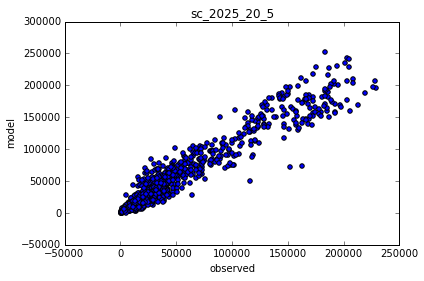

In [29]:
df = pd.read_csv(os.path.join(relative_path,'traffic_counts.csv'))
# Save results by source as seperate df
df_dict = {}
for source in df.groupby('source').count().index.tolist():
    df_dict[source] = df[df['source'] == source]
    
for source in df_dict.keys():
    df_dict[source][['model','observed']].plot(kind='scatter', x='observed',y='model', title=source)